<a href="https://colab.research.google.com/github/VijaySingh93/Mitigate-Bushfires/blob/master/ForestFirePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm_notebook
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cp /content/drive/My\ Drive/challenge1.tar.gz /content

^C


In [ ]:
!wget https://www.dropbox.com/s/ghfhjtoh1z59xeb/wildfire_smoke_data.tar

--2020-08-15 07:20:11--  https://www.dropbox.com/s/ghfhjtoh1z59xeb/wildfire_smoke_data.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ghfhjtoh1z59xeb/wildfire_smoke_data.tar [following]
--2020-08-15 07:20:11--  https://www.dropbox.com/s/raw/ghfhjtoh1z59xeb/wildfire_smoke_data.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0e8c4fa495311460bd65a5bc1.dl.dropboxusercontent.com/cd/0/inline/A9cVxdwBKEZTFhXEW3Ef2rdTkzf86QC2vgEhcuvgZ8KwMJb5t2-J_zJLReTu0JjeRgDcasUqcuFiXLYDUdP8J1OVCxTaQXUZd0vG9-AVTOvzl3w22dk5Rfkvv5KRJHGc1JA/file# [following]
--2020-08-15 07:20:12--  https://ucc0e8c4fa495311460bd65a5bc1.dl.dropboxusercontent.com/cd/0/inline/A9cVxdwBKEZTFhXEW3Ef2rdTkzf86QC2vgEhcuvgZ8KwMJb5t2-J_zJLReTu0JjeRgDcasUqcuFiXL

In [ ]:
!tar -xf wildfire_smoke_data.tar

In [ ]:
import os
from pathlib import Path
smoke = Path('/content/wildfire_smoke_data/train/smoke')
no_smoke = Path('/content/wildfire_smoke_data/train/no_smoke')
smoke_test = Path('/content/wildfire_smoke_data/validate/smoke')
no_smoke_test = Path('/content/wildfire_smoke_data/validate/no_smoke')

In [ ]:
# Create a dataframe with two columns image path 'img_path' and target 'label' for training data
t_smoke = pd.DataFrame(data=[(item, 0) for item in list(smoke.iterdir())], columns=['Path', 'Label'])
t_no_smoke = pd.DataFrame(data=[(item, 1) for item in list(no_smoke.iterdir())], columns=['Path', 'Label'])
data_train = pd.concat([t_smoke, t_no_smoke]).reset_index(drop=True)

In [ ]:
# Create a dataframe with two columns image path 'img_path' and target 'label' for training data
t_smoke = pd.DataFrame(data=[(item, 0) for item in list(smoke_test.iterdir())], columns=['Path', 'Label'])
t_no_smoke = pd.DataFrame(data=[(item, 1) for item in list(no_smoke_test.iterdir())], columns=['Path', 'Label'])
data_test = pd.concat([t_smoke, t_no_smoke]).reset_index(drop=True)

In [ ]:
data_test

In [ ]:
data_train.tail()

,Path,Label
1071,/content/wildfire_smoke_data/train/no_smoke/15...,1
1072,/content/wildfire_smoke_data/train/no_smoke/15...,1
1073,/content/wildfire_smoke_data/train/no_smoke/15...,1
1074,/content/wildfire_smoke_data/train/no_smoke/15...,1
1075,/content/wildfire_smoke_data/train/no_smoke/15...,1


In [ ]:
data_test.tail()

,Path,Label
261,/content/wildfire_smoke_data/validate/no_smoke...,1
262,/content/wildfire_smoke_data/validate/no_smoke...,1
263,/content/wildfire_smoke_data/validate/no_smoke...,1
264,/content/wildfire_smoke_data/validate/no_smoke...,1
265,/content/wildfire_smoke_data/validate/no_smoke...,1


0    575
1    501
Name: Label, dtype: int64


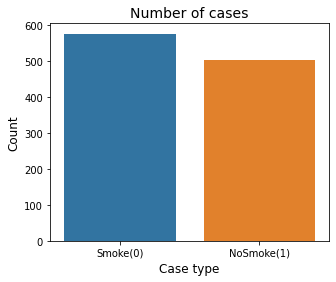

In [ ]:
cases_count = data_train['Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(5,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Smoke(0)', 'NoSmoke(1)'])
plt.show()

In [ ]:
# Set the numpy seed
np.random.seed(111)

In [ ]:
def plot_imgs(item_dirs, num_imgs=25):

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_dirs.sample(num_imgs).values):
        plt.subplot(5, 3, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

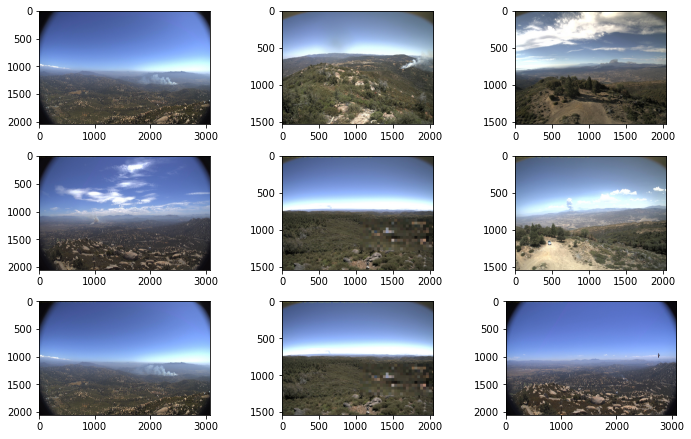

In [ ]:
plot_imgs(data_train[data_train['Label'] == 0]['Path'], num_imgs=9)

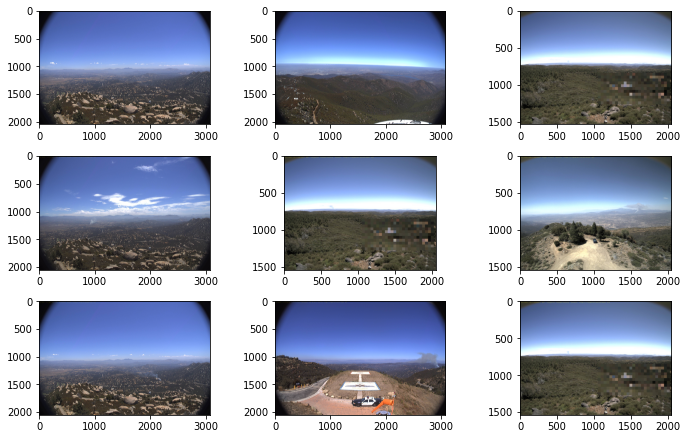

In [ ]:
plot_imgs(data_train[data_train['Label'] == 0]['Path'], num_imgs=9)

In [ ]:
train_dir = Path('/content/wildfire_smoke_data/train/')
test_dir = Path('/content/wildfire_smoke_data/validate/')

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
train_generator = datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(224, 224),
                                    color_mode="rgb",
                                    classes=None,
                                    class_mode="binary",
                                    batch_size=32,
                                    shuffle=True,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix="",
                                    save_format="png",
                                    follow_links=False,
                                    subset=None,
                                    interpolation="nearest")

validation_generator = datagen.flow_from_directory(
                                    test_dir,
                                    target_size=(224, 224),
                                    color_mode="rgb",
                                    classes=None,
                                    class_mode="binary",
                                    batch_size=32,
                                    shuffle=True,
                                    seed=None,
                                    save_to_dir=None,
                                    save_prefix="",
                                    save_format="png",
                                    follow_links=False,
                                    subset=None,
                                    interpolation="nearest")

Found 1074 images belonging to 2 classes.
Found 266 images belonging to 2 classes.


In [ ]:
tf.keras.backend.clear_session()
epochs = 20
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = tf.keras.Sequential()
base_layer = ResNet50(weights='imagenet', include_top=False , input_shape=(224, 224, 3))
for layers in base_layer.layers[:45]:
  layers.trainable = False
model.add(base_layer)

In [ ]:
# Append new layers to Inception V3 model
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,  mode='max')
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint2',
                                                monitor='val_loss',
                                                verbose=1,
                                                save_weights_only=False,
                                                save_best_only=True,
                                                mode='min',
                                                save_freq='epoch')

In [ ]:
callbacks=[reduce_learning_rate, checkpoint]

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 23,850,625
Trainable params: 23,389,441
Non-trainable params: 461,184
______________________________________

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks)

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.7660 - accuracy: 0.6276
Epoch 00001: val_loss improved from inf to 4.19807, saving model to /content/checkpoint2
INFO:tensorflow:Assets written to: /content/checkpoint2/assets
33/33 [==============================] - 106s 3s/step - loss: 0.7660 - accuracy: 0.6276 - val_loss: 4.1981 - val_accuracy: 0.5352
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.7754
Epoch 00002: val_loss did not improve from 4.19807
33/33 [==============================] - 78s 2s/step - loss: 0.4650 - accuracy: 0.7754 - val_loss: 223.9930 - val_accuracy: 0.5273
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.8551
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: val_loss did not improve from 4.19807
33/33 [==============================] - 78s 2s/step - loss: 0.3551 - accuracy: 0.8551 - val_loss: 28.8743 - val_accuracy

In [ ]:
model2 = tf.keras.models.load_model('/content/checkpoint1')

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 2048)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               262272    
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 23,850,625
Trainable params: 23,797,249
Non-trainable params: 53,376
_____________________________________

In [ ]:
%cp -r /content/checkpoint2/ /content/drive/My\ Drive/

In [ ]:
from tqdm import tqdm
x_test = []
img_height = 256
img_width = 256
import cv2
for f in tqdm(data_test['Path']):
  final_image = cv2.imread(str(f), cv2.COLOR_BGR2RGB)
  img_reshape = cv2.resize(final_image, (img_height, img_width))
  x_test.append(img_reshape)

100%|██████████| 266/266 [00:16<00:00, 16.55it/s]


In [ ]:
finalimage = cv2.imread('content/wildfire_smoke_data/validate/smoke/1529021845_+01140.jpg')

In [ ]:
model2 = tf.keras.models.load_model('/content/checkpoint1/')

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test.shape

(266, 256, 256, 3)

In [ ]:
model.predict(x_test)

array([[0.9951473 ],
       [0.9862986 ],
       [0.9985002 ],
       [0.58322656],
       [0.3220412 ],
       [0.90486044],
       [0.93296444],
       [0.86779237],
       [0.88575715],
       [0.9983253 ],
       [0.98714197],
       [0.8976173 ],
       [0.6416914 ],
       [0.9967939 ],
       [0.490857  ],
       [0.2640606 ],
       [0.74762654],
       [0.45040056],
       [0.74311775],
       [0.9950382 ],
       [0.49105844],
       [0.21663155],
       [0.7811209 ],
       [0.7471104 ],
       [0.6301664 ],
       [0.4620162 ],
       [0.10048286],
       [0.93376267],
       [0.85102016],
       [0.69652545],
       [0.73064524],
       [0.89211375],
       [0.98190343],
       [0.98162925],
       [0.91433984],
       [0.81370056],
       [0.7495632 ],
       [0.89791524],
       [0.5109682 ],
       [0.9600696 ],
       [0.8687948 ],
       [0.8694153 ],
       [0.9949882 ],
       [0.9631019 ],
       [0.22720218],
       [0.9626269 ],
       [0.7010721 ],
       [0.551